<a href="https://colab.research.google.com/github/OCE1984/MScDataAnaltyicsPrinciples/blob/main/DAP_Final_Assessment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis

## Importing Tools

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn import preprocessing

## Data Cleaning

In [16]:
'''
import pandas as pd

# Sample DataFrame
data = {
    "Name": ["Alice", "Bob", "Charlie", None, "Eve"],
    "Age": [25, 30, None, 40, 22],
    "Salary": [50000, None, 70000, 80000, 55000]
}
df = pd.DataFrame(data)

# Function to display DataFrame and Data Quality Info
def show_dataframe_with_quality(df):
    from IPython.display import display

    print("🟢 Data Preview:")
    display(df)  # Show DataFrame

    print("\n🟠 Data Quality Information:")
    info_df = pd.DataFrame({
        "Column": df.columns,
        "Data Type": [df[col].dtype for col in df.columns],
        "Missing Values": [df[col].isna().sum() for col in df.columns],
        "Unique Values": [df[col].nunique() for col in df.columns],
        "Sample Values": [df[col].dropna().sample(1).values[0] if df[col].dropna().shape[0] > 0 else None for col in df.columns]
    })

    display(info_df)  # Show Data Quality Table

# Run the function
show_dataframe_with_quality(df)
'''

'\nimport pandas as pd\n\n# Sample DataFrame\ndata = {\n    "Name": ["Alice", "Bob", "Charlie", None, "Eve"],\n    "Age": [25, 30, None, 40, 22],\n    "Salary": [50000, None, 70000, 80000, 55000]\n}\ndf = pd.DataFrame(data)\n\n# Function to display DataFrame and Data Quality Info\ndef show_dataframe_with_quality(df):\n    from IPython.display import display\n    \n    print("🟢 Data Preview:")\n    display(df)  # Show DataFrame\n\n    print("\n🟠 Data Quality Information:")\n    info_df = pd.DataFrame({\n        "Column": df.columns,\n        "Data Type": [df[col].dtype for col in df.columns],\n        "Missing Values": [df[col].isna().sum() for col in df.columns],\n        "Unique Values": [df[col].nunique() for col in df.columns],\n        "Sample Values": [df[col].dropna().sample(1).values[0] if df[col].dropna().shape[0] > 0 else None for col in df.columns]\n    })\n    \n    display(info_df)  # Show Data Quality Table\n\n# Run the function\nshow_dataframe_with_quality(df) \n'

In [13]:
df = pd.read_csv('/content/airline_passenger_satisfaction.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [14]:
df.describe()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,37493.270818,15.119360,997.452477,38.071126,38.465650,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,64940.500000,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,129880.000000,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [15]:
df.drop('ID', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Gender                                  129880 non-null  object 
 1   Age                                     129880 non-null  int64  
 2   Customer Type                           129880 non-null  object 
 3   Type of Travel                          129880 non-null  object 
 4   Class                                   129880 non-null  object 
 5   Flight Distance                         129880 non-null  int64  
 6   Departure Delay                         129880 non-null  int64  
 7   Arrival Delay                           129487 non-null  float64
 8   Departure and Arrival Time Convenience  129880 non-null  int64  
 9   Ease of Online Booking                  129880 non-null  int64  
 10  Check-in Service                        1298

In [16]:
df['Arrival Delay'] = df['Arrival Delay'].fillna(df['Arrival Delay'].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Gender                                  129880 non-null  object 
 1   Age                                     129880 non-null  int64  
 2   Customer Type                           129880 non-null  object 
 3   Type of Travel                          129880 non-null  object 
 4   Class                                   129880 non-null  object 
 5   Flight Distance                         129880 non-null  int64  
 6   Departure Delay                         129880 non-null  int64  
 7   Arrival Delay                           129880 non-null  float64
 8   Departure and Arrival Time Convenience  129880 non-null  int64  
 9   Ease of Online Booking                  129880 non-null  int64  
 10  Check-in Service                        1298

In [17]:
unique_customer_types = df['Customer Type'].unique()
print(unique_customer_types)

['First-time' 'Returning']


In [18]:
df.rename(columns={'Customer Type':'New Customer?'}, inplace=True)
df['New Customer?'] = df['New Customer?'].map({'First-time': 'Yes', 'Returning': 'No'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Gender                                  129880 non-null  object 
 1   Age                                     129880 non-null  int64  
 2   New Customer?                           129880 non-null  object 
 3   Type of Travel                          129880 non-null  object 
 4   Class                                   129880 non-null  object 
 5   Flight Distance                         129880 non-null  int64  
 6   Departure Delay                         129880 non-null  int64  
 7   Arrival Delay                           129880 non-null  float64
 8   Departure and Arrival Time Convenience  129880 non-null  int64  
 9   Ease of Online Booking                  129880 non-null  int64  
 10  Check-in Service                        1298

In [19]:
df.head()

,Gender,Age,New Customer?,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,Male,48,Yes,Business,Business,821,2,5.0,3,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,Female,35,No,Business,Business,821,26,39.0,2,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,Male,41,No,Business,Business,853,0,0.0,4,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,Male,50,No,Business,Business,1905,0,0.0,2,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,Female,49,No,Business,Business,3470,0,1.0,3,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [21]:
unique_customer_types = df['Satisfaction'].unique()
print(unique_customer_types)

['Neutral or Dissatisfied' 'Satisfied']


"oldest = df.groupby(['Survived'])['Age'].max()\nsns.barplot(oldest)"

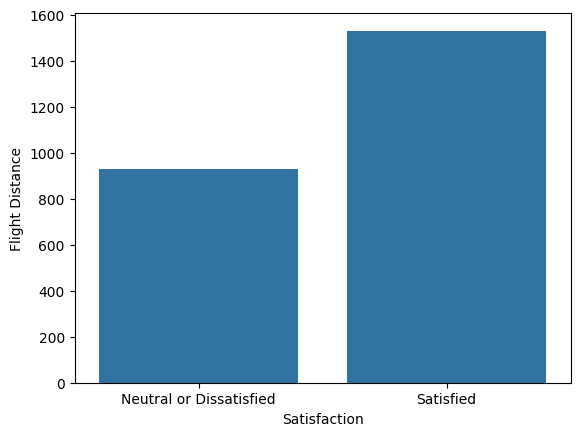

In [27]:
# Groupby

grouped_satis_d = df.groupby(['Satisfaction'])['Flight Distance'].mean()
sns.barplot(grouped_satis_d)



'''oldest = df.groupby(['Survived'])['Age'].max()
sns.barplot(oldest)'''

<Axes: xlabel='Satisfaction', ylabel='Arrival Delay'>

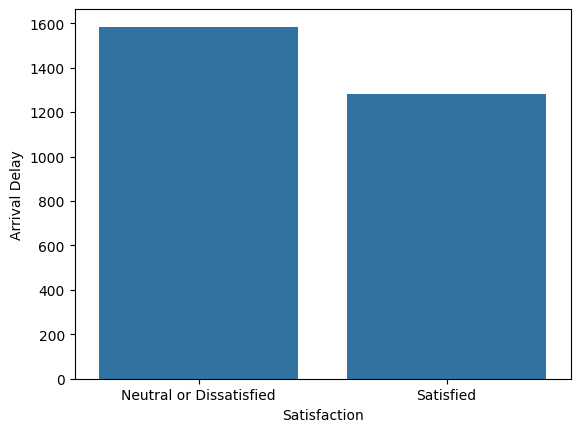

In [26]:
grouped_satis_a = df.groupby(['Satisfaction'])['Arrival Delay'].max()
sns.barplot(grouped_satis_a)

In [ ]:
df.dropna(subset=['Embarked'],inplace=True)
df.info()

In [ ]:
# Feature Engineering
df['Family_size'] = df['SibSp'] + df['Parch'] + 1
df['Name_length'] = df['Name'].apply(len)
df.head()

In [ ]:
# Filtering
df[df.Age > 30]
df[(df.Survived == 1) & (df.Age >30)]
df[df.Pclass != 3]
df[(df.Pclass == 1) | (df.Sex == 'female')]

## Exploratory Analysis (EDA)

In [ ]:
# Correlation Heatmap

correlation = df[['Age', 'Fare', 'Pclass']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

## Machine Learning

### Unsupervised

### Supervised